In [1]:
#!pip install pandas
#%matplotlib inline
import math
import numpy as np
import pandas as pd
import pandasql as ps
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import IPython.display as ipd
from tqdm.notebook import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

import ast

import utils
pd.set_option('display.max_columns', None)

In [33]:
df = pd.read_csv('flat_df_no_nulli.csv', index_col=0)

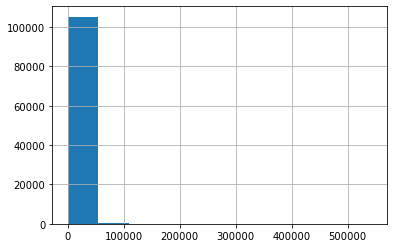

In [34]:
df['ALBUM_listens_'].hist()

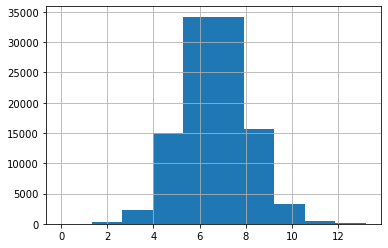

In [35]:
df['ALBUM_listens_'] = df['ALBUM_listens_'].apply(lambda x: np.log(x+1))
df['ALBUM_listens_'].hist()

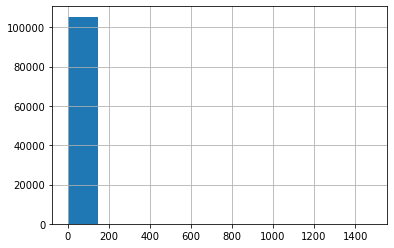

In [36]:
df["ALBUM_favorites_"].hist()

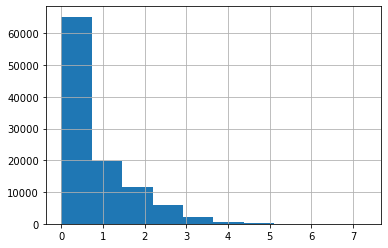

In [37]:
df['ALBUM_favorites_'] = df['ALBUM_favorites_'].apply(lambda x: np.log(x+1))
df['ALBUM_favorites_'].hist()

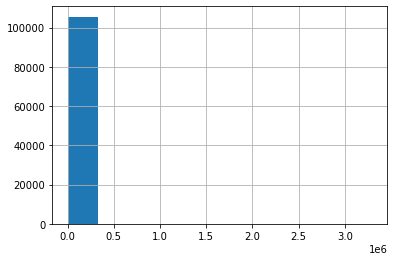

In [38]:
df["TRACK_interest"].hist()

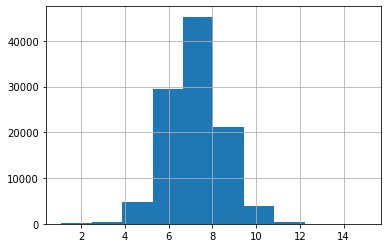

In [39]:
df['TRACK_interest'] = df['TRACK_interest'].apply(lambda x: np.log(x+1))
df['TRACK_interest'].hist()

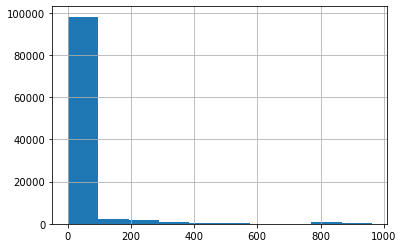

In [40]:
df['ARTIST_favorites'].hist()

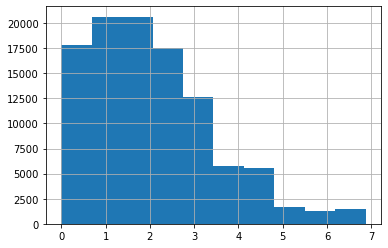

In [41]:
df['ARTIST_favorites'] = df['ARTIST_favorites'].apply(lambda x: np.log(x+1))
df['ARTIST_favorites'].hist()

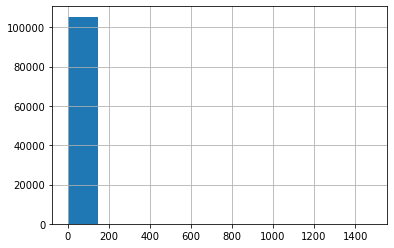

In [42]:
df['TRACK_favorites'].hist()

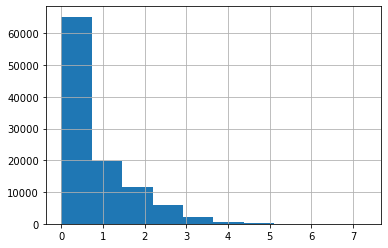

In [43]:
df['TRACK_favorites'] = df['TRACK_favorites'].apply(lambda x: np.log(x+1))
df['TRACK_favorites'].hist()

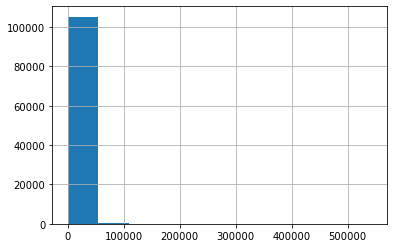

In [44]:
df['TRACK_listens'].hist()

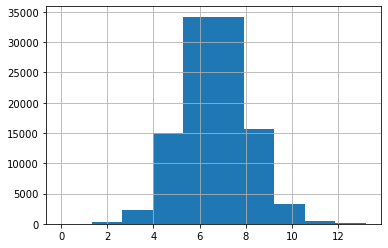

In [45]:
df['TRACK_listens'] = df['TRACK_listens'].apply(lambda x: np.log(x+1))
df['TRACK_listens'].hist()

In [46]:
df.to_csv("flat_df_no_nulli.csv")

In [24]:
features = ['rmsekurtosis01',
 'rmsemax01',
 'rmsemean01',
 'rmsemedian01',
 'rmsemin01',
 'rmseskew01',
 'rmsestd01',
 'spectral_bandwidthkurtosis01',
 'spectral_bandwidthmax01',
 'spectral_bandwidthmean01',
 'spectral_bandwidthmedian01',
 'spectral_bandwidthmin01',
 'spectral_bandwidthskew01',
 'spectral_bandwidthstd01',
 'spectral_centroidkurtosis01',
 'spectral_centroidmax01',
 'spectral_centroidmean01',
 'spectral_centroidmedian01',
 'spectral_centroidmin01',
 'spectral_centroidskew01',
 'spectral_centroidstd01',
 'spectral_rolloffkurtosis01',
 'spectral_rolloffmax01',
 'spectral_rolloffmean01',
 'spectral_rolloffmedian01',
 'spectral_rolloffmin01',
 'spectral_rolloffskew01',
 'spectral_rolloffstd01',
 'zcrkurtosis01',
 'zcrmax01',
 'zcrmean01',
 'zcrmedian01',
 'zcrmin01',
 'zcrskew01',
 'zcrstd01','chroma_censkurtosis',
 'chroma_censmax',
 'chroma_censmean',
 'chroma_censmedian',
 'chroma_censmin',
 'chroma_censskew',
 'chroma_censstd',
 'chroma_censcqtkurtosis',
 'chroma_cqtmax',
 'chroma_cqtmean',
 'chroma_cqtmedian',
 'chroma_cqtmin',
 'chroma_cqtskew',
 'chroma_cqtstd',
 'chroma_stftkurtosis',
 'chroma_stftmax',
 'chroma_stftmean',
 'chroma_stftmedian',
 'chroma_stftmin',
 'chroma_stftskew',
 'chroma_stftstd',
 'mfcckurtosis',
 'mfccmax',
 'mfccmean',
 'mfccmedian',
 'mfccmin',
 'mfccskew',
 'mfccstd',
 'spectral_contrastkurtosis',
 'spectral_contrastmax',
 'spectral_contrastmean',
 'spectral_contrastmedian',
 'spectral_contrastmin',
 'spectral_contrastskew',
 'spectral_contraststd',
 'tonnetzkurtosis',
 'tonnetzmax',
 'tonnetzmean',
 'tonnetzmedian',
 'tonnetzmin',
 'tonnetzskew',
 'tonnetzstd']

rmsekurtosis01


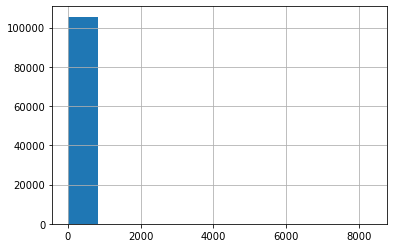

rmsemax01


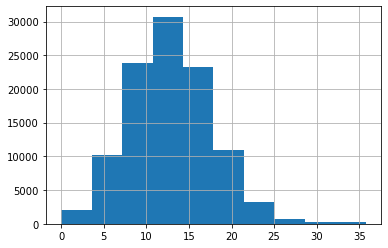

rmsemean01


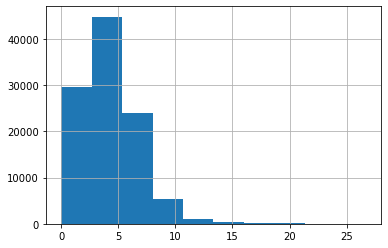

rmsemedian01


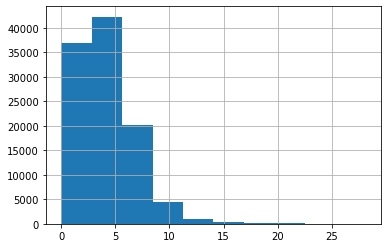

rmsemin01


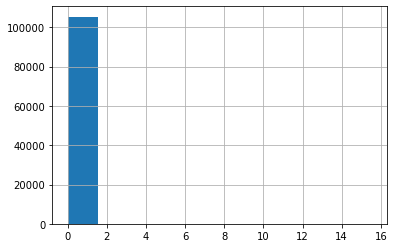

rmseskew01


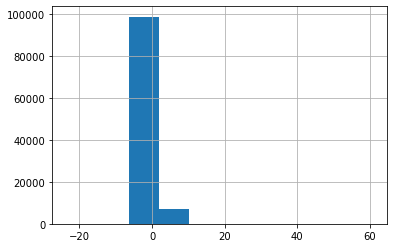

rmsestd01


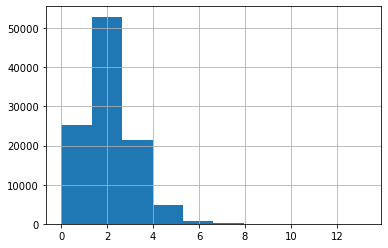

spectral_bandwidthkurtosis01


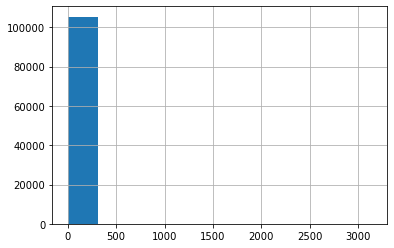

spectral_bandwidthmax01


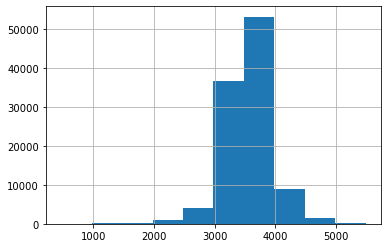

spectral_bandwidthmean01


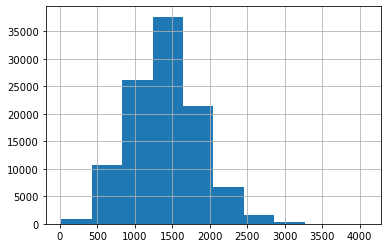

spectral_bandwidthmedian01


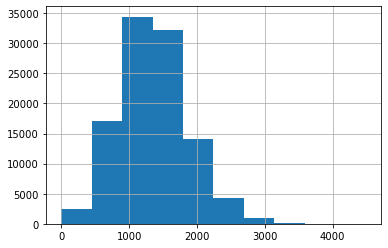

spectral_bandwidthmin01


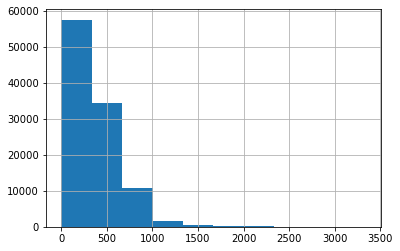

spectral_bandwidthskew01


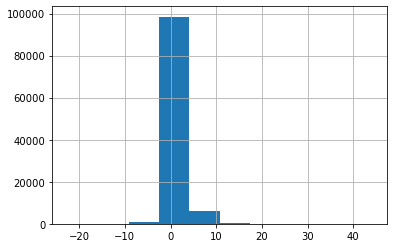

spectral_bandwidthstd01


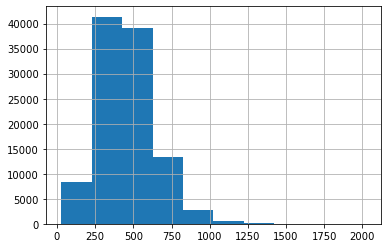

spectral_centroidkurtosis01


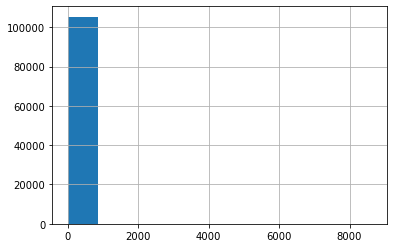

spectral_centroidmax01


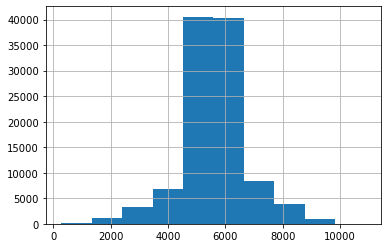

spectral_centroidmean01


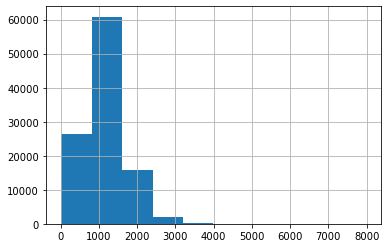

spectral_centroidmedian01


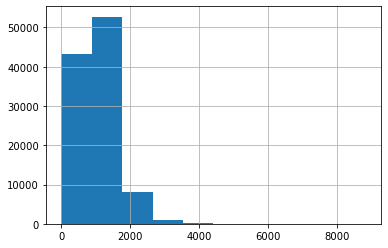

spectral_centroidmin01


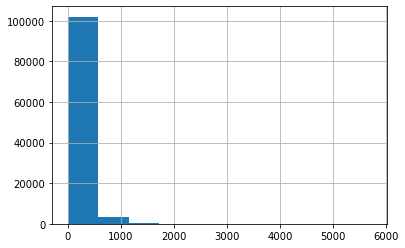

spectral_centroidskew01


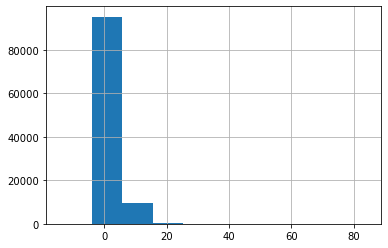

spectral_centroidstd01


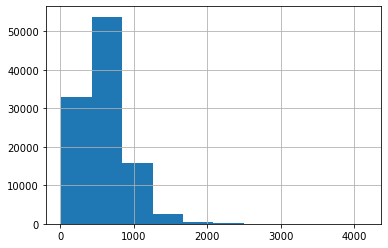

spectral_rolloffkurtosis01


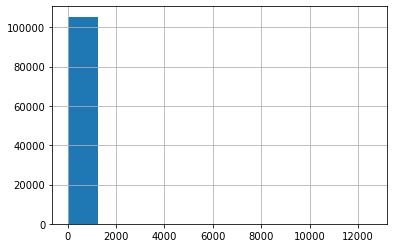

spectral_rolloffmax01


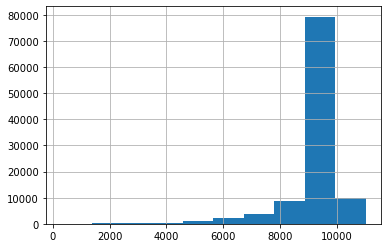

spectral_rolloffmean01


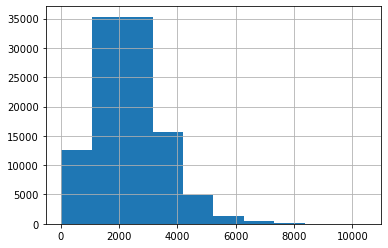

spectral_rolloffmedian01


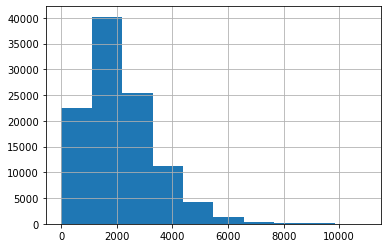

spectral_rolloffmin01


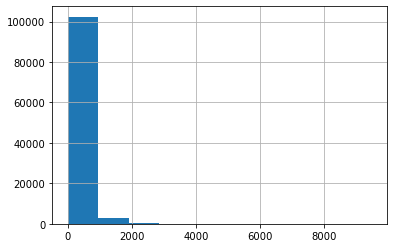

spectral_rolloffskew01


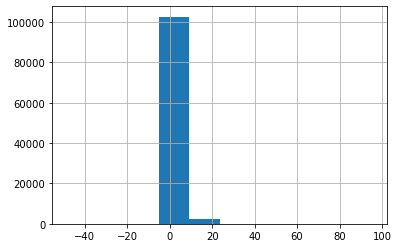

spectral_rolloffstd01


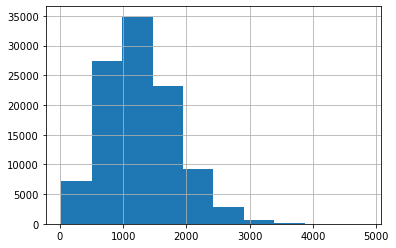

zcrkurtosis01


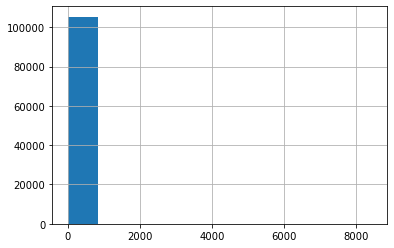

zcrmax01


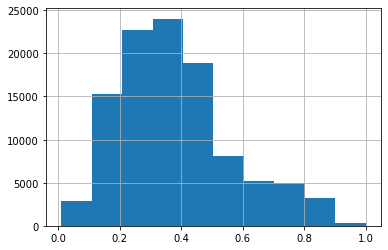

zcrmean01


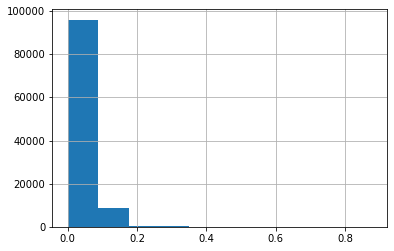

zcrmedian01


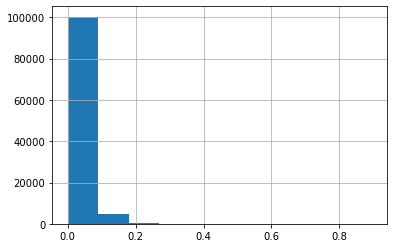

zcrmin01


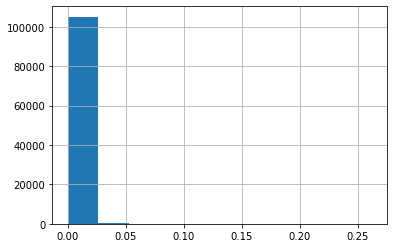

zcrskew01


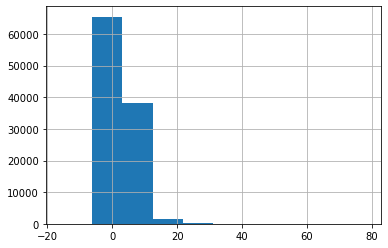

zcrstd01


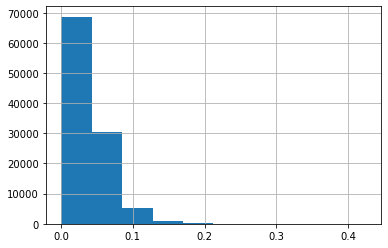

chroma_censkurtosis


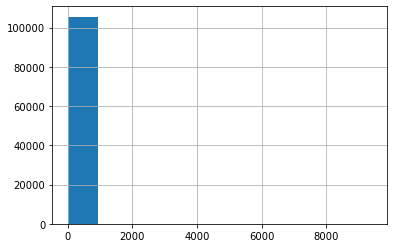

chroma_censmax


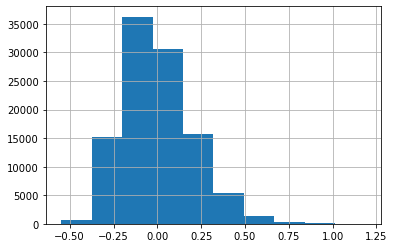

chroma_censmean


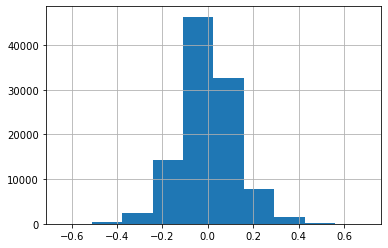

chroma_censmedian


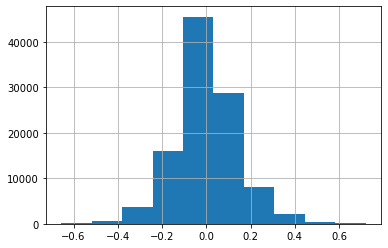

chroma_censmin


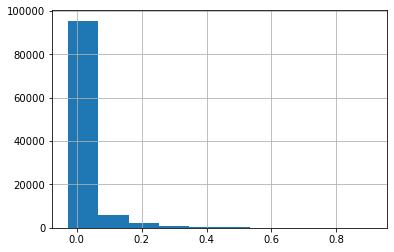

chroma_censskew


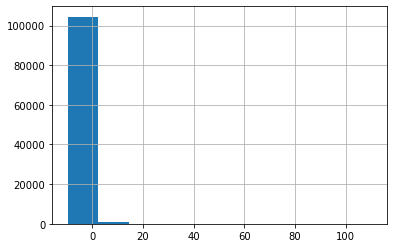

chroma_censstd


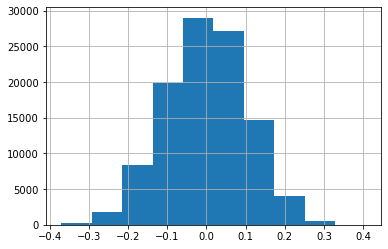

chroma_censcqtkurtosis


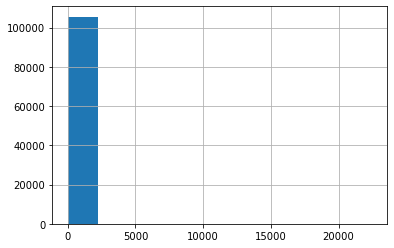

chroma_cqtmax


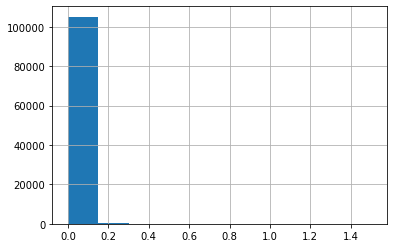

chroma_cqtmean


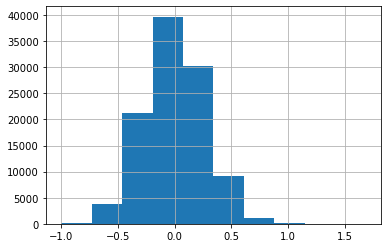

chroma_cqtmedian


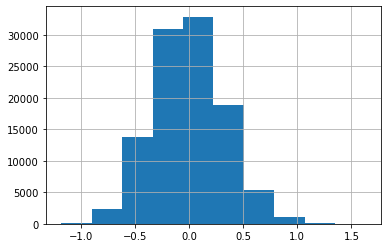

chroma_cqtmin


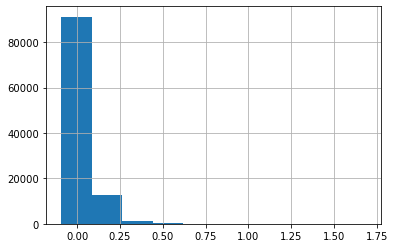

chroma_cqtskew


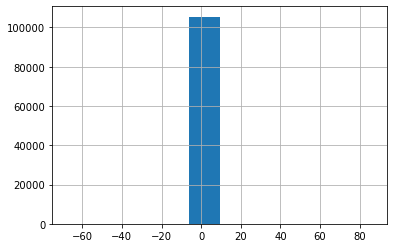

chroma_cqtstd


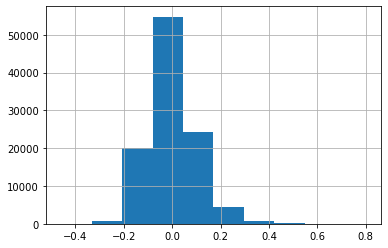

chroma_stftkurtosis


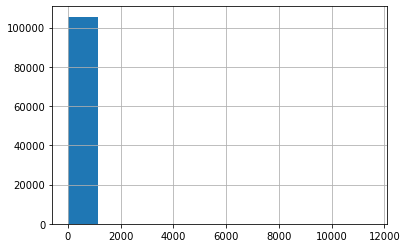

chroma_stftmax


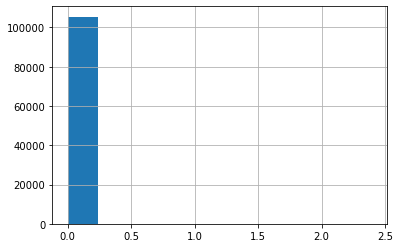

chroma_stftmean


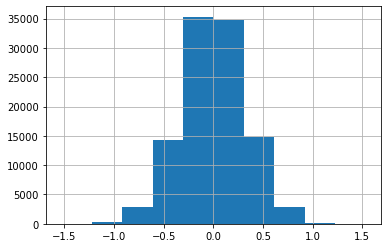

chroma_stftmedian


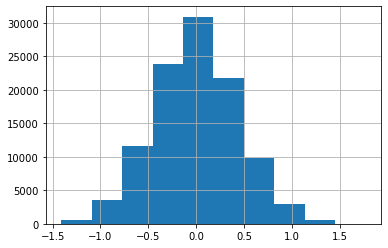

chroma_stftmin


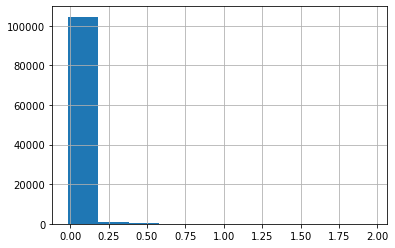

chroma_stftskew


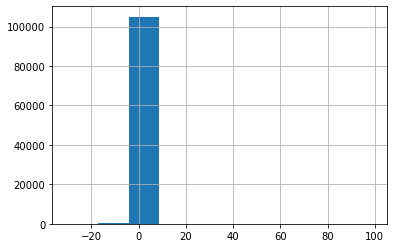

chroma_stftstd


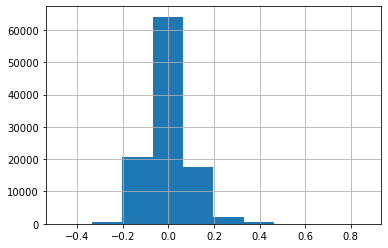

mfcckurtosis


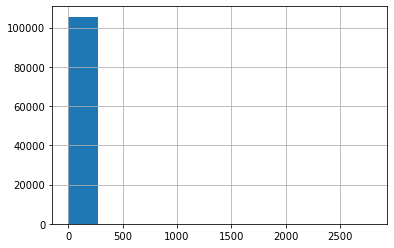

mfccmax


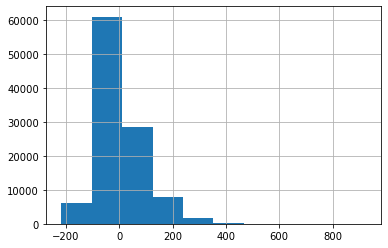

mfccmean


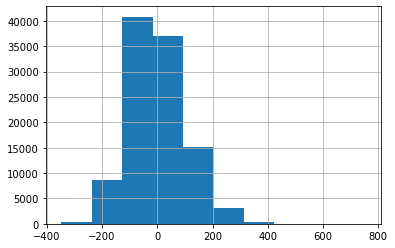

mfccmedian


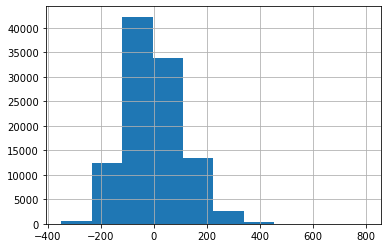

mfccmin


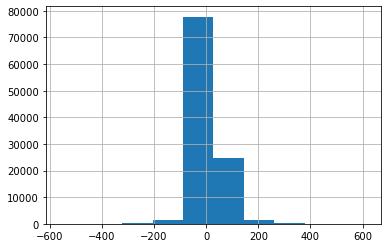

mfccskew


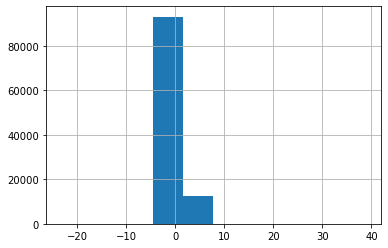

mfccstd


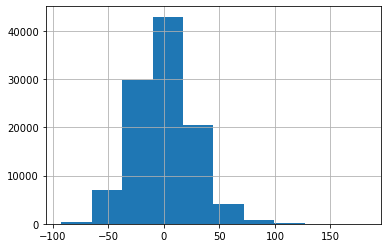

spectral_contrastkurtosis


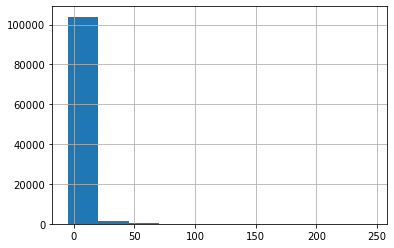

spectral_contrastmax


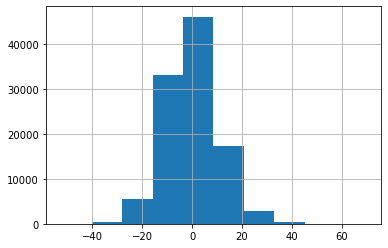

spectral_contrastmean


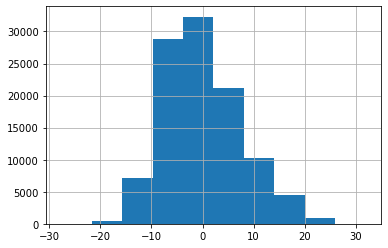

spectral_contrastmedian


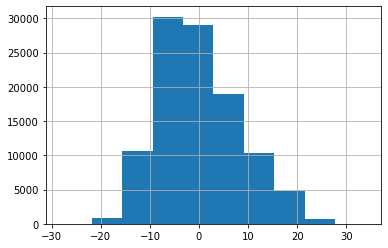

spectral_contrastmin


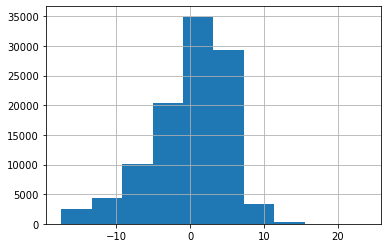

spectral_contrastskew


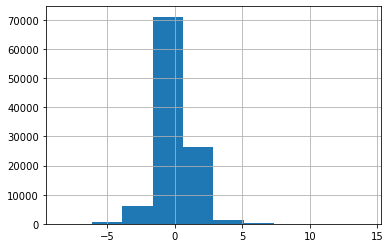

spectral_contraststd


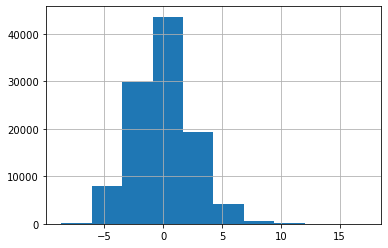

tonnetzkurtosis


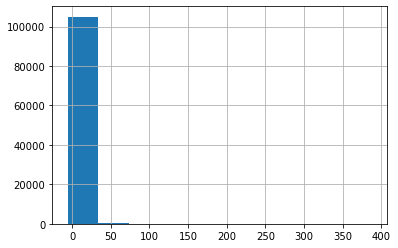

tonnetzmax


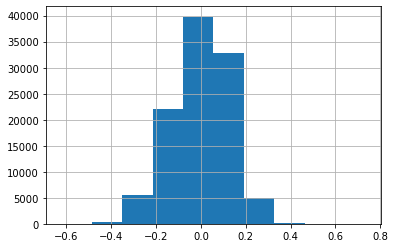

tonnetzmean


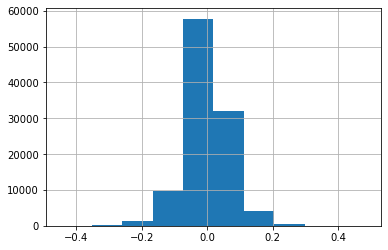

tonnetzmedian


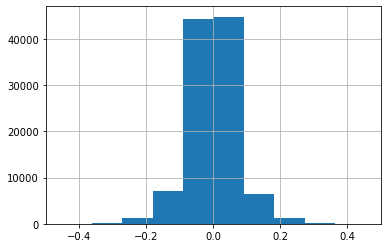

tonnetzmin


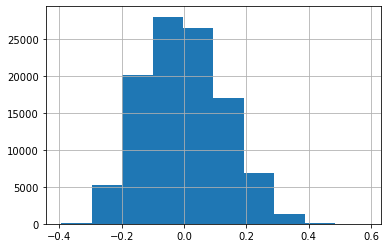

tonnetzskew


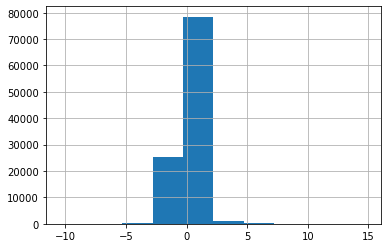

tonnetzstd


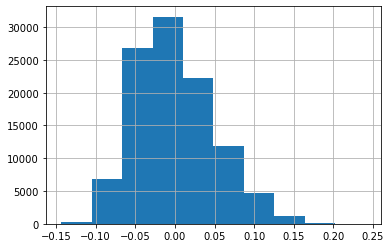

In [29]:
for feature in features:
    print(feature)
    df[feature].hist()
    plt.show()